I think I like the notebook approach. I'm trying to make as much of the "experiment" code reusable as I can. This notebook will probably end up being an attempt to do only that.

In [1]:
import random
import matplotlib.pyplot as plt
import orgsim
%matplotlib inline
plt.ioff()

In [2]:
fiscal_length = 365
id_gen = orgsim.common.SequentialIdentityGenerator()
recruitment_strategy = orgsim.models.recruitment.AverageOfTopContributors(
    identity_generator=id_gen, percentile=0.1
)
seed = orgsim.framework.WorldSeed(
    initial_people={
        orgsim.framework.PersonSeed(
            identity=id_gen.generate(), selfishness=random.random()
        )
        for _ in range(10)
    },
    fiscal_length=fiscal_length,
    productivity=1.0,
    initial_individual_wealth=600_000,
    daily_salary=300_000 / 365,
    daily_living_cost=600_000 / 365,
    periodic_recruit_count=1,
    max_age=fiscal_length * 20,
)
strategy = orgsim.models.DefaultWorldStrategy(
    reward_distribution_strategy=orgsim.models.EqualContribution(),
    recruitment_strategy=recruitment_strategy,
    person_action_strategy=orgsim.models.person.ConstantSelfishness(),
    identity_generator=id_gen,
)

metrics = orgsim.do_experiment(title='example', seed=seed, strategy=strategy)

Period 0
Period 10
Period 20
Period 30
Period 40
Period 50
Period 60
Period 70
Period 80
Period 90
Period 100
Period 110
Period 120
Period 130
Period 140
Period 150
Period 160
Period 170
Period 180
Period 190


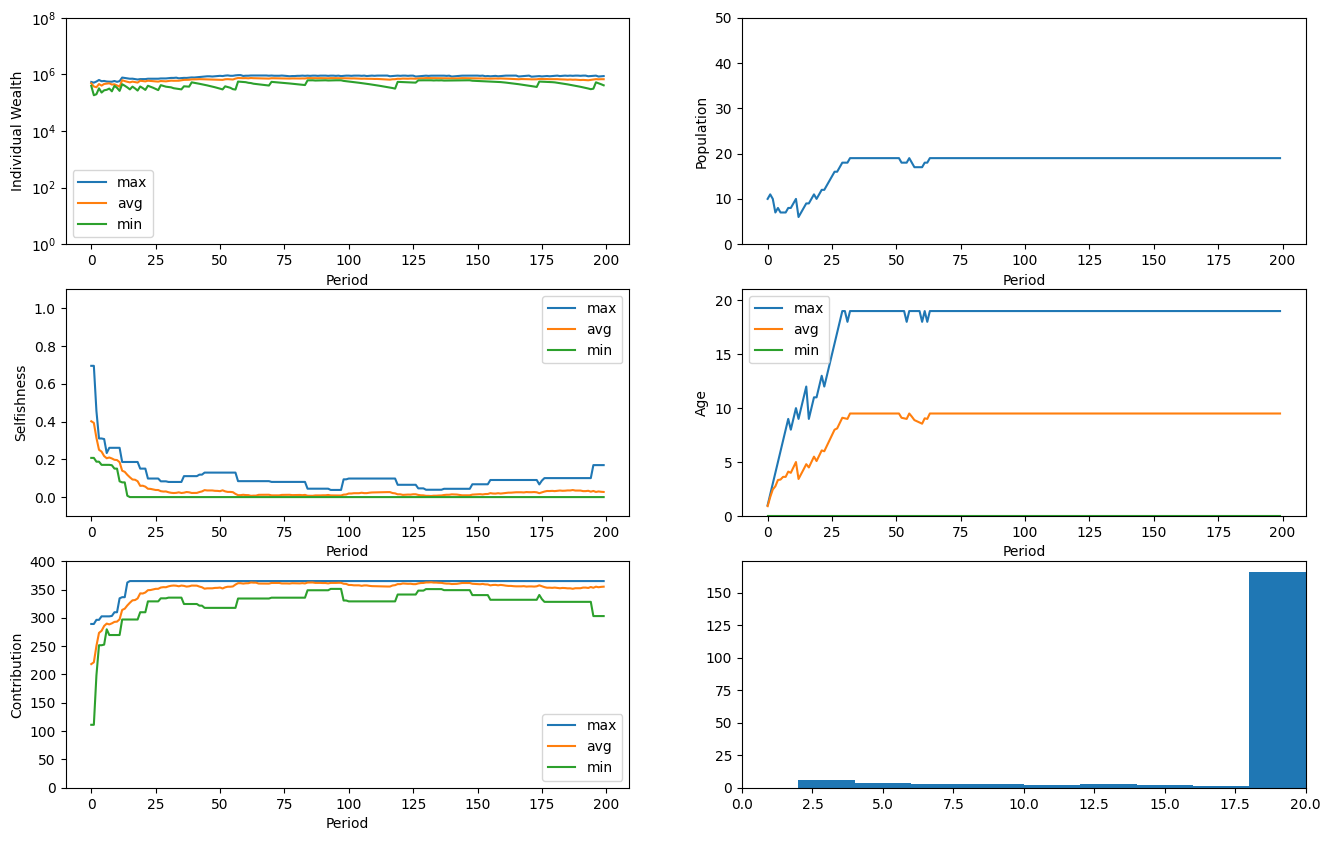

In [3]:
fig, axs = plt.subplots(3, 2, figsize=(16, 10))
orgsim.explore.plot_individual_wealth(metrics, axs[0][0])
orgsim.explore.plot_population(metrics, axs[0][1])
orgsim.explore.plot_selfishness(metrics, axs[1][0])
orgsim.explore.plot_age(metrics, axs[1][1])
orgsim.explore.plot_contribution(metrics, axs[2][0])
orgsim.explore.plot_age_distribution(metrics, axs[2][1])
fig

Well, it seems to be working well enough.

I added metrics for tracking everyone's contribution and/or bonus every day. Seems to be working well enough for now, although I am noticing the runs getting a bit slower. Oh well.


## Fleeting thoughts

I should restructure the strategy classes a bit and make it so that everything related to a person is grouped in one class (including the contents of the seed). If I want to implement AI stuff, right now I have to change code in multiple places, which is kinda bad. I also want to be able to swap and compare different "employee models" in the future, so I should make that as easy as possible. Something something python generics.

I wrote this in my previous notes as well, but I should also define how to evaluate the world from each individual's perspective. At the end of the day, I'm trying to build a system where actions that are optimal for the Individual are also optimal for the Org. But I can't do that without having clearly defined concepts of optimality for both sides. I don't want to be too simplistic and just say "money is everything", but maybe I should go with that as a start. I can modify the objectives later if needed, probably.

Dammit, it's been 2.5h already and I'm still kinda excited about this, but I do feel like my brain is reaching its limit here. I'll continue tomorrow.

## More fleeting thoughts

- reinforcement learning for the employees, genetic algorithms for the org?
- org sees employees only through their "core values"
- "core values" are numbers which influence what outcome the employee desires (or some RL coefficients)
- employee acts (learns) in a way which maximises their own goals
- the "goal" of the org is to survive (at least when not considering bosses like CEO etc)